<a href="https://colab.research.google.com/github/debalina013/RAG-And-AI-Agents-In-Healthcare/blob/main/AI%20Agents/AI_Agents1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PANDAS AI AGENTS IN HEALTHCARE

In [1]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 5.4 MB/s eta 0:00:00


In [2]:
!pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25


In [3]:
!pip install python-dotenv

In [4]:
!pip install langchain-experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [5]:
with open('.env', 'w') as f:
    f.write('GROQ_API_KEY=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')

In [6]:
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
import os

In [8]:
import pandas as pd

In [9]:
from groq import Groq

In [10]:
from langchain_groq import ChatGroq

In [11]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

In [12]:
client = Groq(api_key=os.getenv("GROQ_API_KEY"))

In [13]:
llm = ChatGroq(model_name="llama3-70b-8192")

In [14]:
from langchain.agents.agent_types import AgentType

In [15]:
df = pd.read_excel('/content/vth_3nm.xlsx')

In [16]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)



> Entering new AgentExecutor chain...
Thought: Let's explore the data to identify any trends.

Action: python_repl_ast
Action Input: df.describe()               X          Y
count  19.000000  19.000000
mean   32.000000   0.137260
std    11.254629   0.357567
min    14.000000  -0.852470
25%    23.000000   0.010493
50%    32.000000   0.273209
75%    41.000000   0.392773
max    50.000000   0.454625Let's analyze the descriptive statistics of the data.

Action: python_repl_ast
Action Input: df.plot.scatter(x='X', y='Y')Axes(0.125,0.11;0.775x0.77)Let's analyze the plot.

Action: python_repl_ast
Action Input: df.corr()          X         Y
X  1.000000  0.888619
Y  0.888619  1.000000Thought: I now know the final answer
Final Answer: The trend in the data is a strong positive correlation between X and Y, with Y values generally increasing as X values increase. This is supported by the high correlation coefficient of 0.888619 and the upward sloping scatter plot.

> Finished chain.


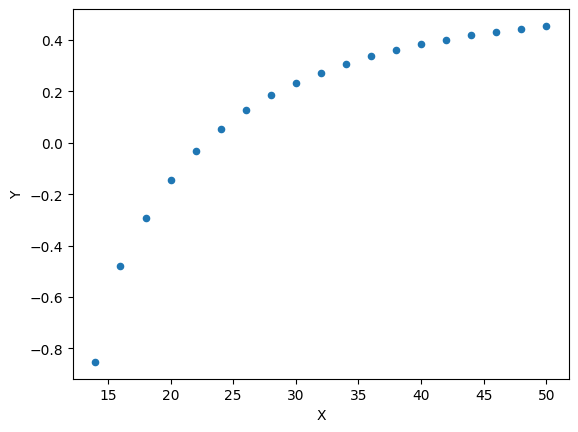

In [17]:
result = agent.invoke('give the trends in the data')

In [21]:
print(result['output'])

The trend in the data is a strong positive correlation between X and Y, with Y values generally increasing as X values increase. This is supported by the high correlation coefficient of 0.888619 and the upward sloping scatter plot.
